In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
import seaborn as sns

In [54]:
def y_func(x):
    return (0.5+0.4*np.sin(2*np.pi*x))

def generate_data(n):
    X_train=np.sort(np.random.uniform(0,1,n))
    X_test=np.sort(np.random.uniform(0,1,n))
    noise_train=np.random.normal(0,0.05,n)
    noise_test=np.random.normal(0,0.05,n)
    Y_train=y_func(X_train)+noise_train
    Y_test=y_func(X_test)+noise_test
    d=[i for i in range (0,10)]
    poly=dict()
    for d in range(0,10):
        poly[d]=np.polyfit(X_train,Y_train,d)
    fits=dict()
    for key in poly:
        fits[key]=np.polyval(poly[key],X_test)
    return(X_train,X_test,Y_train,Y_test,fits,poly)

def mse(A,B):
    return (np.square(A - B)).mean(axis=None)

def plot_fits(X_train,X_test,Y_test,fits):
    fig,axs= plt.subplots(4,3, figsize =( 12,9))
    for k,(i,j) in enumerate(product(range(0,3),range(0,3))):
        axs[i, j].plot(X_train,Y_train,'ro')
        axs[i, j].plot(X_test,Y_test,'bo')
        axs[i, j].plot(X_test, fits[k])
        axs[i, j].set_title(f'{k}-order')
    axs[3,0].plot(X_train,Y_train,'ro',label='train')
    axs[3,0].plot(X_test,Y_test,'bo',label='test')
    axs[3,0].plot(X_test,fits[9],label='fit')
    axs[3,0].set_title('9-order')
    for ax in axs.flat:
        ax.set(xlabel='X', ylabel='Y')
        ax.label_outer()
        #ax.set_xlim([-0.5,1.5])
        ax.set_ylim([-0.5,1.5])
    fig.legend(loc='right')
    fig.suptitle(f'N = {n}')

1. Consider the function: $y(x)=0.5+0.4sin(2\pi x)$, for x in [0,1] <br>
Use this function to generate two noisy sets of n points (train and test)
that will be used for modeling y, for <br> n = 9, 15, 100. <br> The x-coordinates should
be uniformly (at random) distributed over [0, 1], <br> y-coordinates should be con-
taminated with Gaussian noise with $\mu = 0; \sigma = 0.05$. <br>
*Hint*: You can use the numpy.random.uniform and numpy.random.normal
functions.

N=9


c:\users\ljschinkelshoek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


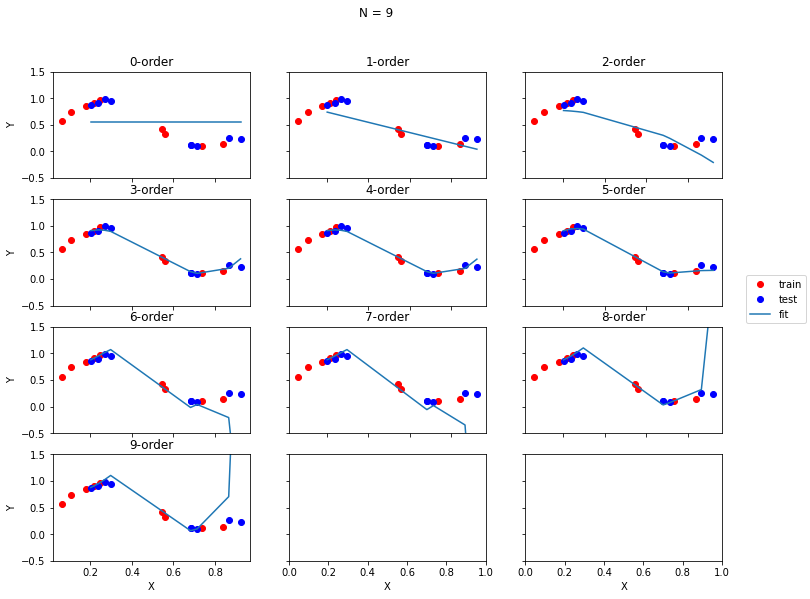

In [55]:
n=9

(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
plot_fits(X_train,X_test,Y_test,fits)

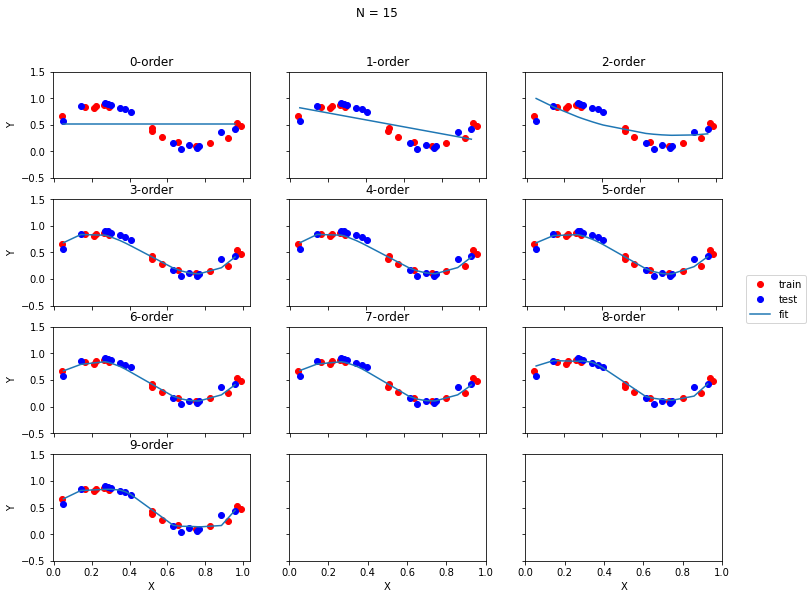

In [57]:
n=15

(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
plot_fits(X_train,X_test,Y_test,fits)


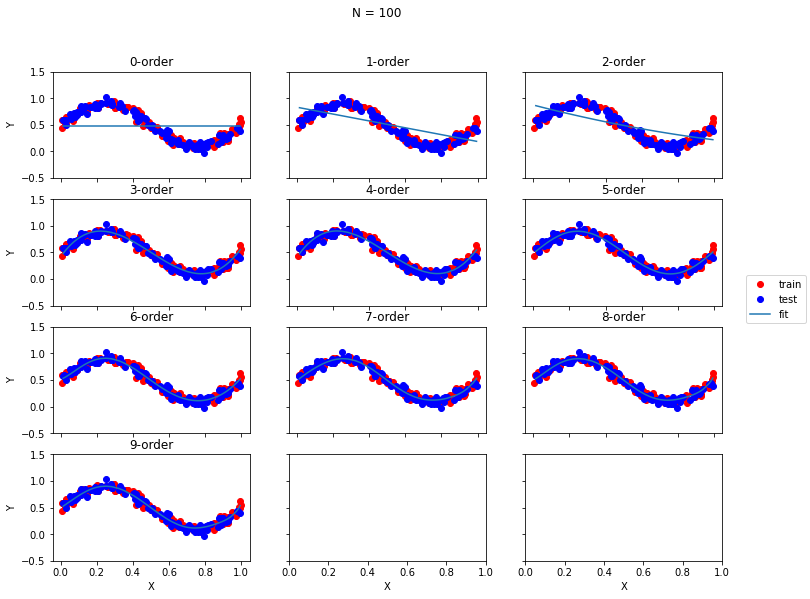

In [56]:
n=100

(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
plot_fits(X_train,X_test,Y_test,fits)

2. Find the best polynomial approximation of degree d (d = 0, 1, ..., 9) of the training set and plot the results. <br>
*Hint*: check the numpy.polyfit and numpy.polyval functions

In [ ]:
N = [9,15,100]
results=dict()
for n in N:
    (X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
    errors=np.zeros(10)
    for d in range(0,10):
        errors[d]=mse(fits[d],Y_test)
    results[n]=errors

In [ ]:
fig,(ax1, ax2, ax3)=  plt.subplots( 3)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(results[9],'ro')
ax1.set_title('MSE for n=9')
ax2.plot(results[15],'ro')
ax2.set_title('MSE for n=15')
ax3.plot(results[100],'ro')
ax3.set_title('MSE for n=100')
#plt.show()